In [1]:
import multiprocessing

In [2]:
# pip install gensim
import gensim

In [3]:
def preprocessing(string):
    return string

def iter_sentence():
    with open('../dz4/source_task_train.csv','r') as f:
        f.readline()
        for line in f:
            yield preprocessing(line.strip().split(',')[1].lower()).split()
            
    with open('../dz4/source_task_test_without_labels.csv', 'r') as f:
        f.readline()
        for line in f:
            yield preprocessing(line.strip().split(',')[1].lower()).split()
            
class SentenseIterator():
    def __iter__(self):
        yield from iter_sentence()
    

In [4]:
sentences = SentenseIterator()

model = gensim.models.Word2Vec(
    max_vocab_size=10**5,
    min_count=5,
    workers=multiprocessing.cpu_count()
)

In [ ]:
# gensim.models.Doc2Vec

In [5]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
model.build_vocab(sentences=sentences)

2018-01-11 22:39:21,748 : INFO : collecting all words and their counts
2018-01-11 22:39:21,751 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-11 22:39:22,139 : INFO : pruned out 0 tokens with count <=1 (before 100020, after 100020)
2018-01-11 22:39:22,196 : INFO : pruned out 67838 tokens with count <=2 (before 100021, after 32183)
2018-01-11 22:39:22,229 : INFO : PROGRESS: at sentence #10000, processed 624306 words, keeping 40782 word types
2018-01-11 22:39:22,548 : INFO : pruned out 70422 tokens with count <=3 (before 100035, after 29613)
2018-01-11 22:39:22,644 : INFO : PROGRESS: at sentence #20000, processed 1240584 words, keeping 53671 word types
2018-01-11 22:39:22,906 : INFO : pruned out 71958 tokens with count <=4 (before 100014, after 28056)
2018-01-11 22:39:23,053 : INFO : PROGRESS: at sentence #30000, processed 1867972 words, keeping 63792 word types
2018-01-11 22:39:23,289 : INFO : pruned out 72993 tokens with count <=5 (before 100003, aft

In [7]:
model.train(sentences, epochs=1,  total_examples=model.corpus_count)

2018-01-11 22:39:38,780 : INFO : training model with 8 workers on 23888 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-01-11 22:39:39,789 : INFO : PROGRESS: at 5.21% examples, 693341 words/s, in_qsize 13, out_qsize 3
2018-01-11 22:39:40,805 : INFO : PROGRESS: at 10.78% examples, 712916 words/s, in_qsize 14, out_qsize 0
2018-01-11 22:39:41,823 : INFO : PROGRESS: at 15.92% examples, 698579 words/s, in_qsize 12, out_qsize 2
2018-01-11 22:39:42,828 : INFO : PROGRESS: at 20.91% examples, 684098 words/s, in_qsize 15, out_qsize 0
2018-01-11 22:39:43,846 : INFO : PROGRESS: at 25.80% examples, 672051 words/s, in_qsize 13, out_qsize 2
2018-01-11 22:39:44,861 : INFO : PROGRESS: at 30.97% examples, 670944 words/s, in_qsize 13, out_qsize 1
2018-01-11 22:39:45,878 : INFO : PROGRESS: at 35.88% examples, 665946 words/s, in_qsize 15, out_qsize 1
2018-01-11 22:39:46,886 : INFO : PROGRESS: at 40.41% examples, 656673 words/s, in_qsize 13, out_qsize 3
2018-01-11 22:39:47

12888920

In [8]:
model.most_similar('сказать')

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
2018-01-11 22:40:04,257 : INFO : precomputing L2-norms of word weight vectors


[('сказать.', 0.7983908653259277),
 ('заметить', 0.7449775338172913),
 ('сказать:', 0.7325986623764038),
 ('сказатьчто', 0.7278571128845215),
 ('отметить', 0.6752554774284363),
 ('предположить', 0.6734310388565063),
 ('сказать?', 0.6734174489974976),
 ('заявить', 0.6703495383262634),
 ('терпеть', 0.6566836833953857),
 ('скажу', 0.6559432744979858)]

In [9]:
model.train(sentences, epochs=10, total_examples=model.corpus_count)

2018-01-11 22:40:36,230 : INFO : training model with 8 workers on 23888 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-01-11 22:40:37,241 : INFO : PROGRESS: at 0.58% examples, 772329 words/s, in_qsize 11, out_qsize 4
2018-01-11 22:40:38,244 : INFO : PROGRESS: at 1.26% examples, 841032 words/s, in_qsize 14, out_qsize 1
2018-01-11 22:40:39,253 : INFO : PROGRESS: at 1.95% examples, 853784 words/s, in_qsize 14, out_qsize 3
2018-01-11 22:40:40,258 : INFO : PROGRESS: at 2.63% examples, 860321 words/s, in_qsize 15, out_qsize 0
2018-01-11 22:40:41,289 : INFO : PROGRESS: at 3.37% examples, 876814 words/s, in_qsize 15, out_qsize 0
2018-01-11 22:40:42,311 : INFO : PROGRESS: at 4.06% examples, 878682 words/s, in_qsize 13, out_qsize 2
2018-01-11 22:40:43,322 : INFO : PROGRESS: at 4.75% examples, 880154 words/s, in_qsize 13, out_qsize 1
2018-01-11 22:40:44,323 : INFO : PROGRESS: at 5.43% examples, 879555 words/s, in_qsize 15, out_qsize 0
2018-01-11 22:40:45,323 : 

128882573

In [91]:
model.most_similar('яблоко')

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('банан', 0.8255964517593384),
 ('апельсин', 0.8094344139099121),
 ('творог', 0.7973516583442688),
 ('ваниль', 0.7834175229072571),
 ('орех', 0.7815746068954468),
 ('орехи', 0.7505563497543335),
 ('суфле', 0.750086784362793),
 ('изюм', 0.7423356771469116),
 ('лимонным', 0.7407302856445312),
 ('лимонной', 0.7403898239135742)]

In [12]:
# model.wv.index2word

In [15]:
model.wv.word_vec('сказать')

array([-0.10158558,  0.53247195,  0.76034272, -1.18534696,  1.11867523,
       -0.27283093,  3.43774438,  2.85320067,  0.38998765, -3.33712506,
       -4.17308664,  3.30790186, -2.39962077,  0.01475876,  1.01918066,
       -0.58165747,  2.68597746,  3.56499553,  4.52222204,  4.04136229,
        4.40913486, -2.30780959,  1.82648349, -2.84716868, -1.96459174,
       -1.30122042,  0.60521525, -0.91473454, -0.7274552 , -1.2536788 ,
       -0.85968548, -1.91877532,  1.06099355, -0.09186786, -1.98952389,
       -0.29335779, -3.02956796, -0.51968324, -0.29419529,  2.3907671 ,
       -1.48197079, -5.82960463, -1.4333688 ,  3.78237033,  0.78785831,
       -1.78942502, -1.17703247, -0.52084392,  4.74001741,  2.31821752,
       -0.15941003, -3.00472689,  0.10487612, -0.38783425,  1.81881905,
        0.55768448, -2.02543473, -0.75258756,  0.27681649,  0.78075475,
        0.08787881, -1.96911502,  0.60662258, -4.62628555, -2.2815516 ,
       -0.65672594, -0.94091535,  0.35248163, -3.1742816 , -0.58

In [16]:
from sklearn.manifold import  TSNE

In [18]:
tsne = TSNE(n_components=2, verbose=1)

In [30]:
w2c=tsne.fit_transform(model.wv.syn0norm)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 23888
[t-SNE] Computed conditional probabilities for sample 2000 / 23888
[t-SNE] Computed conditional probabilities for sample 3000 / 23888
[t-SNE] Computed conditional probabilities for sample 4000 / 23888
[t-SNE] Computed conditional probabilities for sample 5000 / 23888
[t-SNE] Computed conditional probabilities for sample 6000 / 23888
[t-SNE] Computed conditional probabilities for sample 7000 / 23888
[t-SNE] Computed conditional probabilities for sample 8000 / 23888
[t-SNE] Computed conditional probabilities for sample 9000 / 23888
[t-SNE] Computed conditional probabilities for sample 10000 / 23888
[t-SNE] Computed conditional probabilities for sample 11000 / 23888
[t-SNE] Computed conditional probabilities for sample 12000 / 23888
[t-SNE] Computed conditional probabilities for sample 13000 / 23888
[t-SNE] Computed conditional probabilities 

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
import matplotlib
font = {'family': 'Verdana',
        'weight': 'normal'}
matplotlib.rc('font', **font)

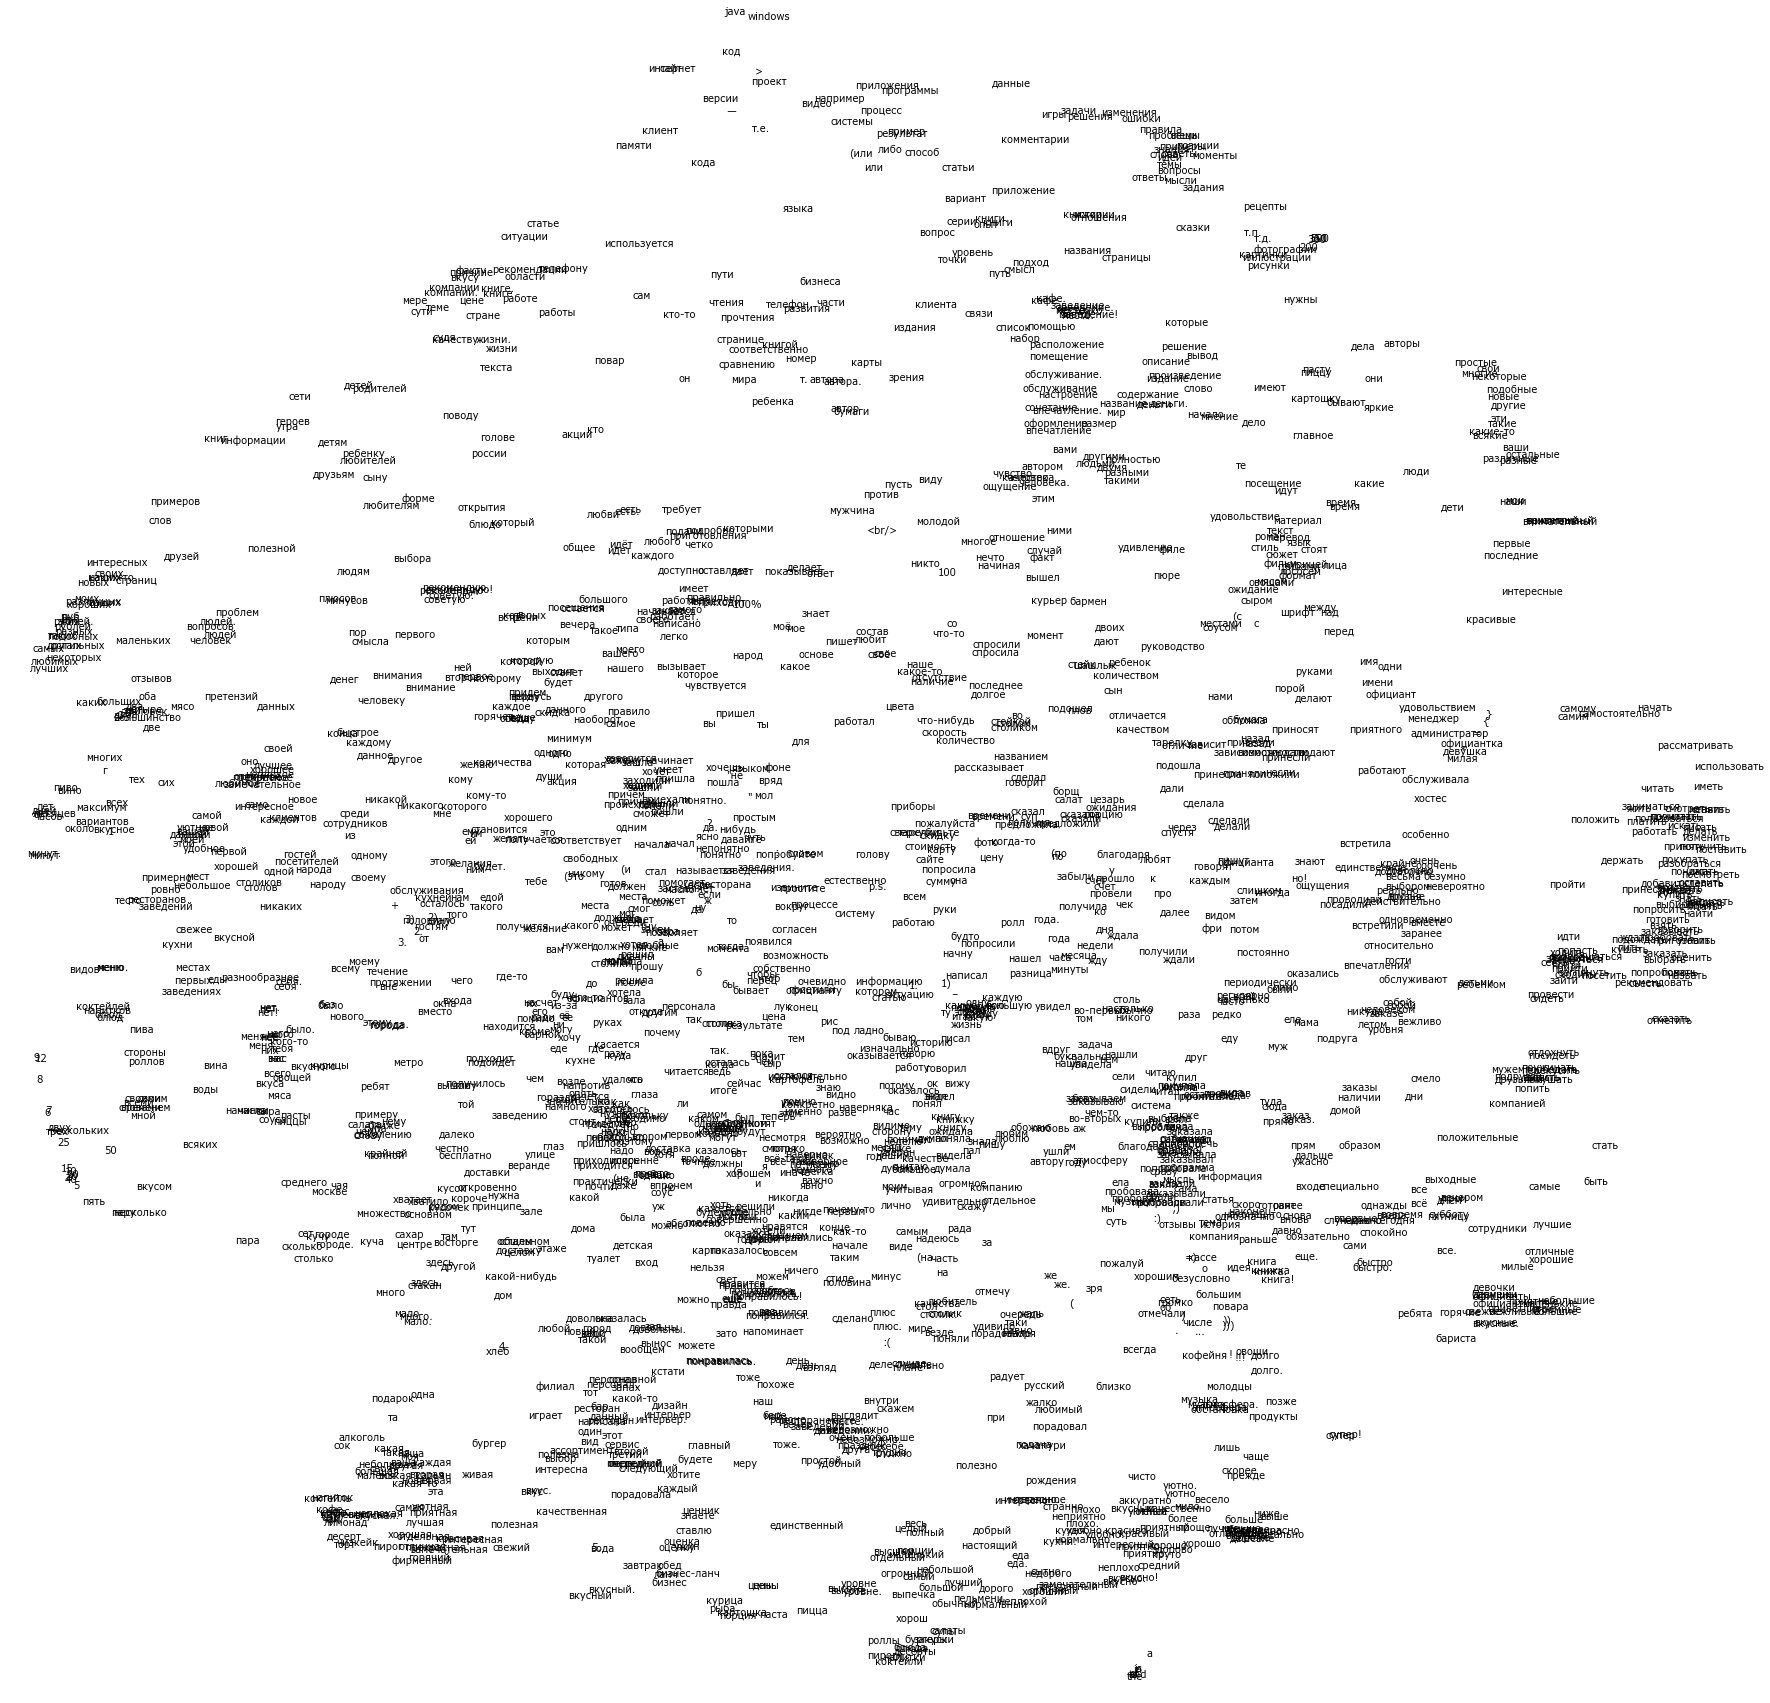

In [58]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(w2c[:,0],w2c[:,1],s=70,alpha=0.001)

ax.set_xlim(w2c[:,0].min(), w2c[:,0].max())
ax.set_ylim(w2c[:,1].min(), w2c[:,1].max())
ax.axis('off')

for idx, point in enumerate(w2c[:2000]):
    ax.annotate(model.wv.index2word[idx], point)
plt.savefig('w2v.png')

In [92]:
!open .

In [95]:
model.most_similar(positive=['огурец',],  negative=['зелёный','красный'])

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('финансовых', 0.41620588302612305),
 ('успевать', 0.39027220010757446),
 ('бизнесе', 0.3814065158367157),
 ('жизнь', 0.377806156873703),
 ('открыто', 0.3771571218967438),
 ('социальных', 0.3753284513950348),
 ('практике', 0.3744421899318695),
 ('практических', 0.36957550048828125),
 ('критически', 0.36250564455986023),
 ('работающих', 0.3624516725540161)]

In [96]:
model.most_similar(positive=['студент', 'кот'])

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('дядя', 0.7189187407493591),
 ('учитель', 0.6992888450622559),
 ('ученик', 0.6855688095092773),
 ('отец', 0.6828990578651428),
 ('врач', 0.6635116338729858),
 ('писатель', 0.6486822366714478),
 ('ник', 0.6287073493003845),
 ('брат', 0.6261070966720581),
 ('бухгалтер', 0.6234560012817383),
 ('сосед', 0.6179471015930176)]

In [97]:
model.most_similar(positive=[':(','радость'], negative=['грусть'])

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('совсем.', 0.41197648644447327),
 ('т.к', 0.4070401191711426),
 ('но', 0.4065917134284973),
 ('тк', 0.4044486880302429),
 ('(((', 0.38752463459968567),
 ('ибо', 0.3810916543006897),
 ('((', 0.37607336044311523),
 ('))', 0.373853474855423),
 (':)', 0.37290963530540466),
 ('буду.', 0.3709825873374939)]